# Stem Cells

Cells in the body typically either 
- have a specific job to do, and typically don't reproduce
- or have the ability to divide and eventually become a cell with a specific job.

The latter cells are called "stem cells".  The full complexity of stem cells is beyond our scope here.  We will start with some of the earliest mathematical models of stem cells which were used to help understand their properties.

We begin with some experimental observations.  Individual cells are taken from a spleen and allowed to reproduce.  It is observed that some cells do very little reproduction.  Other cells lead to rapidly growing colonies (referred to as *colony-forming cells*).  Within these large colonies, some cells are colony-forming cells, but many are not.

## The Till model
Experiments (described above) and analysis by Till showed the existence of stem-cells.

In the original model it is assumed that there are just two types of cells: "stem cells" (or colony-forming cells / colony-forming units) and "differentiated cells". 

Experimentally, a number of colonies were formed that each started with one cell.  These grew for some number of days (10 or 12).  The number of colony-forming cells within each of these colonies was found to vary widely.


```{figure} TillExptCD1.png
---
name: TillExptCD1
width: 45%
align: left
---
Experimental data from Till *et al*, showing the number of colony-forming cells (colony-forming units) in colonies after 10 days.
```

```{figure} TillExptCD.png
---
name: TillExptCD
width: 45%
align: right
---
Experimental data from Till *et al*, showing the number of colony-forming cells (colony-forming units) in colonies after 12 days.
```


A stem cell can either divide into two stem cells with probability $p_2$, or it can become a differentiated cell with probability $p_0$.  The differentiated cells never return to being stem cells.  In the model by Till, we count only stem cells, so we can treat differentiated cells as "dead".

```{figure} TillExpts.png
---
name: TillExpts
width: 600px
---
The model of Till *et al*, as well as some stochastic simulations.
```

The offspring distribution of a stem cell in this model has PGF $\mu(x) = p_0 + p_2 x^2$.

Using simulations Till found

```{figure} TillSims.png
---
name: TillSims
width: 300px
---
Simulation results
```

Below is the exact calculation for the cumulative distribution with these parameters (the plot is conditional on at least one colony forming unit).

g=20, p0=0.4, p2=0.6
deg(Phi_g) = 1048576, computed probs length = 1048577
sum probs = 0.9999999999999430
P(Z_g=0) = 0.664827


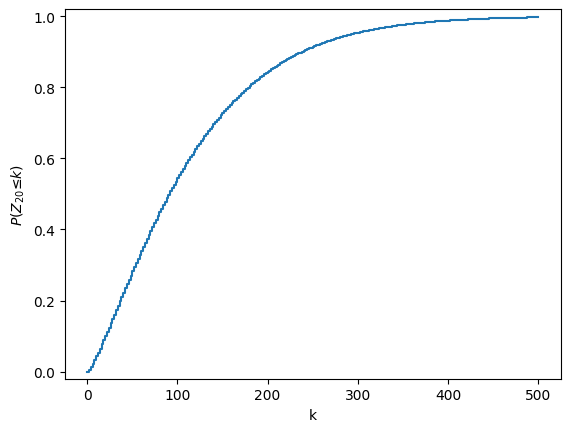

In [26]:
import numpy as np
import matplotlib.pyplot as plt


def phi_g_distribution_via_roots_of_unity(
    g, mu, M = None,
):
    """
    Galton–Watson generation g with offspring PGF mu(x) = p0 + p2 x^2 (p2=1-p0),
    starting from 1 individual.

    Notation:
        Phi_g(x) = PGF of Z_g
        Phi_0(x) = x
        Phi_{g+1}(x) = mu(Phi_g(x)) = p0 + p2*(Phi_g(x))^2

    Numerics:
        Evaluate Phi_g(z_m) for z_m = exp(2π i m/M), m=0,...,M-1,
        then recover P(Z_g = k) via inverse FFT.
    """
    if not (0.0 <= p0 <= 1.0):
        raise ValueError("p0 must be in [0,1].")
    p2 = 1.0 - p0

    max_deg = 2**g
    if M is None:
        # FFT-friendly; ensure M > max_deg
        M = 1
        while M <= max_deg:
            M *= 2

    if M <= max_deg:
        raise ValueError(f"M must be > 2^g = {max_deg}. Got M={M}.")

    m = np.arange(M)
    z = np.exp(2j * np.pi * m / M)

    # Phi_0(z) = z
    Phi = z.copy()

    # Phi_{g+1}(z) = p0 + p2 * Phi_g(z)^2
    for ctr in range(g):
        
        #print(f"  Iteration {ctr} / {g}")
        Phi = mu(Phi)#p0 + p2 * (Phi * Phi)
        

    # Recover coefficients by inverse DFT (ifft)
    probs = np.fft.fft(Phi).real/M  # tiny imaginary parts are numerical noise

    # Clean & normalize
    probs[probs < 0] = 0.0
    s = probs.sum()
    if s == 0:
        raise RuntimeError("All probabilities are zero after numerical cleanup.")
    probs /= s

    # True support is k=0..2^g; truncate
    probs = probs[: max_deg + 1]
    k = np.arange(max_deg + 1)
    return k, probs




g = 20
p0 = 0.4
max_k_to_plot = 500
k, probs = phi_g_distribution_via_roots_of_unity(g=g, mu = lambda x: p0 + (1-p0)*x**2)

print(f"g={g}, p0={p0}, p2={1-p0}")
print(f"deg(Phi_g) = {2**g}, computed probs length = {len(probs)}")
print(f"sum probs = {probs.sum():.16f}")
print(f"P(Z_g=0) = {probs[0]:.6g}")

probs[k<=1] = 0.0
probs /= probs.sum()

cdf = np.cumsum(probs)
if max_k_to_plot is not None:
    max_k_to_plot = int(max_k_to_plot)
    k = k[: max_k_to_plot + 1]
    cdf = cdf[: max_k_to_plot + 1]

plt.figure()
plt.step(k, cdf, where="post")
plt.ylim(-0.02, 1.02)
plt.xlabel("k")
plt.ylabel(r"$P(Z_{20} ≤ k)$")
plt.show()


## Vogel Model
A later model, known as the Vogel model assumed that stem cells either divide into two stem cells (with probabilty $p$), divide into two differentiated cells (with probability $q$), or divide into a stem cell and a differentiated cell (with probability $r$).

```{figure} VogelModel.png
---
name: fig-VogelModel
width: 400
---
The Vogel Model
```

```{figure} VogelExtinction.png
---
name: fig-VogelExtinction
width: 400
---
A claim by Vogel about calculating extinction probability and probability of a given size.
```



g=20, p0=0.4, p2=0.6
deg(Phi_g) = 1048576, computed probs length = 1048577
sum probs = 0.9999999999999772
P(Z_g=0) = 0.782641


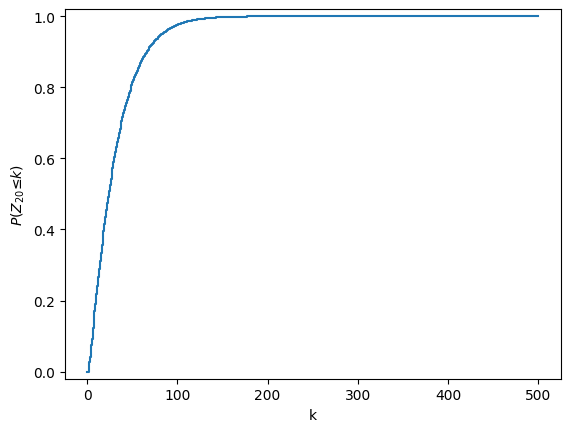

In [28]:
g = 20
r=0.1
p=0.4
q = 1- r- p
max_k_to_plot = 500
k, probs = phi_g_distribution_via_roots_of_unity(g=g, mu = lambda x: p + r*x +q*x**2)

probs[k<=1] = 0.0
probs /= probs.sum()

cdf = np.cumsum(probs)
if max_k_to_plot is not None:
    max_k_to_plot = int(max_k_to_plot)
    k = k[: max_k_to_plot + 1]
    cdf = cdf[: max_k_to_plot + 1]

plt.figure()
plt.step(k, cdf, where="post")
plt.ylim(-0.02, 1.02)
plt.xlabel("k")
plt.ylabel(r"$P(Z_{20} ≤ k)$")
plt.show()


## Macken-Perelson

Now we follow Catherine Macken and Alan Perelson (*Stem Cell Proliferation and Differentiation*).  In this model they study "stem cells" ($S$), "macrophage progenitors" ($M$), and "end cells" ($E$).  

- Stem cells: may divide arbitarily many times producing (in each generation)
  - 2 new stem cells with probability $p_s^2$
  - 1 stem and 1 mast cell with probability $2p_s(1-p_s)$
  - or 2 mast cells with probability $(1-p_s)^2$
- Mast cells: may divide producing (in each generation):
  - 2 mast cells with probability $p_m^2$
  - 1 mast and 1 end cell with probability $2p_m(1-p_m)$
  - or 2 end cells with probablity $p_m^2$.
- End cells: do not divide and remain until the end. This is modeled as producing 
  - 1 end cell with probablity $1$ in each generation.

Using $x$ to represent stem cells, $y$ to represent mast cells, and $z$ to represent end cells, the offspring PGFs are

\begin{align*}
\xi_s(x,y,z) &= p_s^2 x^2 + 2 p_s(1-p_s) xy + (1-p_s)^2y^2 \\
             &= (p_s x + (1-p_s)y)^2\\
\xi_m(x,y,z) &= p_m^2 y^2 + 2 p_m(1-p_m)yz + (1-p_m)^2z^2\\
             &= (p_m y + (1-p_m)z)^2\\
\xi_e(x,y,z) &= z
\end{align*}

If we begin with one stem cell, then the initial PGF is 

$$
f_0(x,y,z)=x
$$  
The PGF for generation $1$ is 

$$
f_1(x,y,z) = \xi_s(x,y,z) = (p_s x + (1-p_s)y)^2
$$
We note that

$$
f_1(x,y,z) = f_0(\xi_s(x,y), \xi_m(y,z), \xi_e(z))
$$

and more generally

$$
f_{g+1}(x,y,z) = f_g(\xi_s(x,y), \xi_m(y,z), \xi_e(z))
$$

Iteration here starts to be difficult because we find $f_1$ and then need to substitute in the function for $x,y,z$.  It is better to define

\begin{align*}
\vec{\Phi}_{g+1}(x,y,z) &= \left(\xi_s(\vec{\Phi}_g(x,y,z)), \xi_m(\vec{\Phi}_g(x,y,z)), \xi_e(\vec{\Phi}_g(x,y,z))\right)
%\vec{\Phi}_{g+1}(x,y,z| (0,1,0)) &= \left(\xi_s(\vec{\Phi}_g(x,y,z|(0,1,0))), \xi_m(\vec{\Phi}_g(x,y,z|(0,1,0))), \xi_e(x,y,z|(0,1.0))%\right)\\
%\vec{\Phi}_{g+1}(x,y,z| (0,0,1)) &= \left(\xi_s(\vec{\Phi}_g(x,y,z|(0,0,1))), \xi_m(\vec{\Phi}_g(x,y,z|(0,0,1))), \xi_e(x,y,z|(0,0,1))%\right)
\end{align*}
with

\begin{align*}
\vec{\Phi}_0(x,y,z) &= (x,y,z)
\end{align*}

This would then convert the $f_g(x,y,z)$ above, which corresponds to one initial stem cell, into $f_{g}(x,y,z) = \mu_s(\vec{\Phi}_{g-1}(x,y,z))$.  Alternately, we can consider other initial conditions easily.



### Expected size

Extending our earlier results the expected number at generation $g$ is given by

$$
\begin{pmatrix}
\mathbb{E}[X_g|\vec{v}_0]\\
\mathbb{E}[Y_g|\vec{v}_0]\\
\mathbb{E}[Z_g|\vec{v}_0]
\end{pmatrix} = M^g \vec{v}_0
$$
where $\vec{v}_0  = \in\{ (1,0,0), (0,1,0), (0,0,1) \}$ captures the the initial condition and

$$
M = \begin{pmatrix} 
2 p_s  & 2(1-p_s) & 0\\
0 & 2 p_m & 2(1-p_m)\\
0 & 0 & 1
\end{pmatrix}
$$

The triangular nature of this matrix allows makes it possible to calculate these analytically if desired.

### Extinction probability

We will define "extinction probability" to mean no stem or mast cells.  We study the reduced model of just stem and mast cells (which corresponds to setting $z=1$).

We have

\begin{align*}
\xi_s(x,y) &= p_s^2 x^2 + 2 p_s(1-p_s) xy + (1-p_s)y^2 \\
             &= (p_s x + (1-p_s)y)^2\\
\xi_m(x,y) &= p_m^2 y^2 + 2 p_m(1-p_m)y + (1-p_m)\\
             &= (p_m y + (1-p_m))^2\\
\end{align*}
Following our earlier calculation of extinction probabilities, we define $\vec{\alpha}(g) = (\alpha(g|(1,0)), \alpha(g|(0,1)))$ to be a vector of extinction probaiblities given that the inital cell is a stem or mast cell.  Then by {prf:ref}`thm-TwoTypeExtinct`,

$$
\vec{\alpha}(g)= (\alpha_s(g), \alpha_m(g)) = \left(\xi_s(\vec{\alpha}(g-1)), \quad\xi_m(\vec{\alpha}(g-1))\right)
$$
with $\vec{\alpha}(0) = (0,0)$.  Due to the dependence of $\xi_m$ on only $y$, we can see that 

$$
\alpha_m(g) = (p_m \alpha_m(g-1) + (1-p_m))^2
$$
with $\alpha_m(0)=0$.  Taking the limit $g \to \infty$ and setting $\alpha_m = \lim_{g\to\infty} \alpha_m(g)$ we know

\begin{align*}
\alpha_m &= p_m^2 \alpha_m^2 + 2p_m(1-p_m)\alpha_m + (1-p_m)^2\\
\Rightarrow 0 &= p_m^2\alpha_m^2 + (-1 + 2p_m-2p_m^2) \alpha_m + (1-p_m)^2\\
\Rightarrow 0 &= \alpha_m^2 + \frac{-1+2p_m-2p_m^2}{p_m^2}\alpha_m + \frac{(1-p_m)^2}{p_m^2}
\end{align*}
One root of this must be $\alpha_m=1$ (WHY??).  We want the other root.  Guided by the fact that $\alpha_m-1$ factors this, we find

$$
0  = (\alpha_m-1)\left(\alpha_m- \frac{(1-p_m)^2}{p_m^2}\right)
$$
If $p_m\leq 0.5$ then this other root is $\geq 1$.  
So the extinction probability starting from a mast cell is

$$
\alpha_m = \begin{cases} 1 & 0 \leq p_m \leq 05\\
            \left( \frac{1-p_m}{p_m}\right)^2 & 0.5<p_m \leq 1
            \end{cases}
$$
Turning now to $\alpha_s = \lim_{g\to\infty} \alpha_s(g)$ and using the now known value of $\alpha_m$, we have

$$
\alpha_s = p_s^2 \alpha_s^2 + 2p_s(1-p_s) \alpha_s \alpha_m + (1-p_s)^2 \alpha_m^2
$$
If $\alpha_m=1$, then this is equivalent to the equation we already solved for $\alpha_m$.  Otherwise $\alpha_m = \left(\frac{1-p_m}{p_m}\right)^2$ and 

$$
0 = \alpha_s^2 + \frac{2 p_s(1-p_s)\left(\frac{1-p_m}{p_m}\right)^2- 1}{p_s^2} \alpha_s + \frac{(1-p_s)^2 \alpha_m^2}{p_s^2}
$$
This can be solved using the quadratic formula

$$
\alpha_s = \begin{cases} 1 & 0 \leq p_s \leq 0.5 , \: 0 \leq p_m \leq 0.5\\
      \left(\frac{1-p_s}{p_s}\right)^2 & 0.5 < p_s \leq 1\\
      \frac{1}{2p_s^2} - \frac{1-p_s}{p_s}\left(\frac{1-p_m}{p_m}\right)^2 - \frac{1}{p_s} \sqrt{\frac{1}{4p_s^2} - \frac{1-p_s}{p_s}\left(\frac{1-p_m}{p_m}\right)^2} & 0 < p_s \leq 1 , \: 0.5\leq p_m \leq 1\\ 
\end{cases}
$$




### Colony size at completion
A quantity that can be measured reasonably easily for colonies that stop growth is the number of end cells at completion.  This is useful to estimate parameters in the model.  We can numerically calculate the probablity of a final size $Z=\ell$ by first calculating $\lim_{g\to\infty} \vec{\Phi}_g(0,0,z)$ which gives the generating function $\sum_{\ell=0}^\infty p_{0,0,\ell}z^\ell$ for those cases that terminate.  Then using a Cauchy integral (which may need to careful if the extinction probability is less than $1$) we could numerically estimate the value.

Remarkably though, this can be calculated exactly.

Let:
- $\Omega_s(\theta) = \sum_\ell q_\ell(s) \theta^\ell$ be the PGF for the final size if the initial cell is a stem cell,
- $\Omega_m(\theta) = \sum_\ell q_\ell(m) \theta^\ell$ be the PGF if the initial cell is a mast cell, and
- $\Omega_e(\theta) = \theta$ be the PGF if the initial cell is an end cell.

Then we can conclude recursively that

\begin{align*}
\Omega_s(\theta) &= \xi_s(\Omega_s(\theta),\Omega_m(\theta),0)\\
\Omega_m(\theta) &= \xi_m(0 , \Omega_m(\theta), \Omega_e(\theta))\\
\Omega_e(\theta) &= \theta
\end{align*}
From the equation for $\Omega_m(\theta)$:

\begin{align*}
\sum_{\ell=0}^\infty q_\ell(m) \theta^\ell &= (p_m\psi_m(\theta) + (1-p_m)\theta)^2\\
&= p_m^2 \left[ \sum_{\ell} q_\ell(m) \theta^\ell\right]^2 + 2 p_m(1-p_m) \sum_\ell q_\ell(m)\theta^{\ell+1} + (1-p_m)^2 \theta^2\\
&= p_m^2 \left[ \sum_j q_j(m) \theta^j\right]\left[ \sum_k q_k(m) \theta^k\right] + 2 p_m(1-p_m) \sum_\ell q_\ell(m)\theta^{\ell+1} + (1-p_m)^2 \theta^2\\
&= p_m^2 \sum_{\ell=0}^\infty \sum_{j+k=\ell} q_j(m)q_{k}(m) \theta^\ell + 2p_m(1-p_m) \sum_\ell q_\ell(m) \theta^{\ell+1} + (1-p_m)^2 \theta^2\\
&=p_m^2 \sum_{\ell=0}^\infty \sum_{j=0}^\ell q_j(m)q_{\ell-j}(m) \theta^\ell + 2p_m(1-p_m) \sum_{\ell=0}^\infty q_\ell(m) \theta^{\ell+1} + (1-p_m)^2 \theta^2
\end{align*}
It is not possible to end with $0$ or $1$ end cells if starting with one mast cell.  So $q_0(m)=q_1(m)=0$.  Then for $\ell = 2$ matching coefficients of $\theta^2$ gives

$$
q_2(m) = (1-p_m)^2
$$
For $\ell>2$

$$
q_\ell(m) = \sum_{j=2}^{\ell-2} q_j(m) q_{\ell-j}(m) + 2 p_m (1-p_m) q_{\ell-1}(m)
$$ 

Repeating this process with $\psi_s(\theta)$ can be used to find the final size of the colony if it stops growing.


### Colony size if complete by generation $g$

```{figure} MackenPerelsonFinalSizeClaim.png
---
name: fig-MackenPerelsonFinalSizeClaim
width: 600px
---
Quote from Macken and Perelson about the importance of estimating the probability of completion at a given size by a particular generation.  (In their notation, $Pr(Z_n=(0,0,k)|Z_0)$ is the probability of extinction with size $k$ at generation $n$).  This was written in 1980, so the numerical methods available then were more limited.
```

To find the colony size if it goes extinct by generation $g$ for different initial condtions, we can calculate $\vec{\Phi}_g(0,0,z)$ and using Caucy integrals to calculate the coefficients of the components $\xi_s(\vec{\Phi}_{g-1}(0,0,z))$ and $\xi_m(\vec{\Phi}_{g-1}(0,0,z))$.


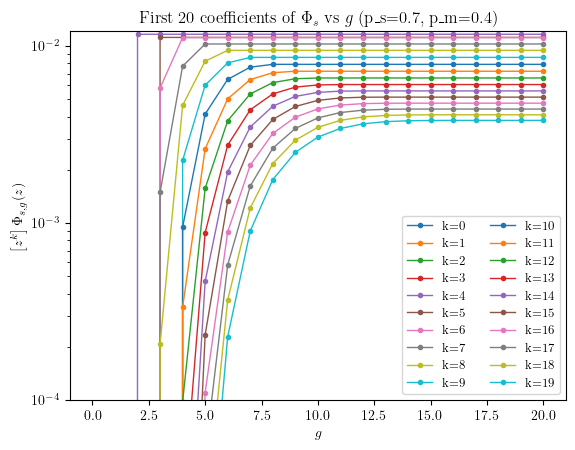

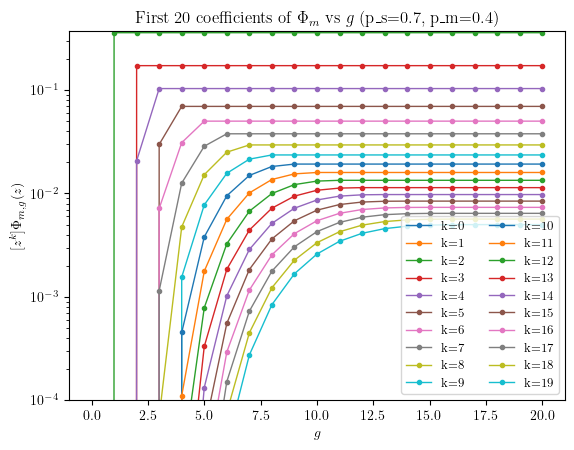

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def xi_s(x, y, z, p_s):
    return (p_s * x + (1.0 - p_s) * y) ** 2


def xi_m(x, y, z, p_m):
    return (p_m * y + (1.0 - p_m) * z) ** 2


def iterate_vector_phi_on_roots_of_unity(g, p_s, p_m, M, dtype=np.complex128):
    """
    vec{Phi}_{t+1}(z) = (xi_s(Phi_t), xi_m(Phi_t), z)
    with Phi_0(z) = (0,0,z), evaluated on roots of unity z_m = exp(2π i m/M).

    Returns Phi_s_vals (M,), Phi_m_vals (M,).
    """
    m = np.arange(M, dtype=np.float64)
    z = np.exp(2j * np.pi * m / M).astype(dtype)

    Phi_s = np.zeros(M, dtype=dtype)
    Phi_m = np.zeros(M, dtype=dtype)
    Phi_e = z  # always z

    for _ in range(g):
        Phi_s_new = xi_s(Phi_s, Phi_m, Phi_e, p_s)
        Phi_m_new = xi_m(Phi_s, Phi_m, Phi_e, p_m)
        Phi_s, Phi_m = Phi_s_new, Phi_m_new

    return Phi_s, Phi_m


def coeffs_from_samples(samples, K):
    """
    If samples are f(z_m) for z_m = exp(2π i m/M), then
        a_k = (1/M) * sum_m f(z_m) z_m^{-k}
    is given by:
        a = FFT(samples) / M
    """
    M = samples.shape[0]
    a = np.fft.fft(samples) / M
    return a[:K]


def clean_to_real(a, tol=1e-14):
    a = np.array(a, dtype=np.complex128)
    # zero tiny values (both real/imag)
    a[np.abs(a) < tol] = 0.0
    # drop tiny imaginary parts if they are just roundoff
    if np.max(np.abs(a.imag)) < 10 * tol:
        return a.real
    return a


def compute_first_K_coeffs_over_g(gmax, p_s, p_m, M, K):
    """
    For g = 0..gmax, compute first K coefficients of Phi_s,g and Phi_m,g.
    Returns:
        coeffs_s: shape (gmax+1, K)
        coeffs_m: shape (gmax+1, K)
    """
    coeffs_s = np.zeros((gmax + 1, K), dtype=np.float64)
    coeffs_m = np.zeros((gmax + 1, K), dtype=np.float64)

    for g in range(gmax + 1):
        Phi_s_vals, Phi_m_vals = iterate_vector_phi_on_roots_of_unity(g, p_s, p_m, M)

        a_s = clean_to_real(coeffs_from_samples(Phi_s_vals, K))
        a_m = clean_to_real(coeffs_from_samples(Phi_m_vals, K))

        # If still complex (shouldn't be), store real part
        coeffs_s[g, :] = np.real(a_s)
        coeffs_m[g, :] = np.real(a_m)

    return coeffs_s, coeffs_m


def plot_coeffs_vs_g(coeffs, title, ylabel):
    """
    coeffs has shape (gmax+1, K). Plot each k=0..K-1 as a curve vs g.
    """
    gvals = np.arange(coeffs.shape[0])
    K = coeffs.shape[1]

    plt.figure()
    for k in range(K):
        plt.plot(gvals, coeffs[:, k], marker="o", linewidth=1, markersize=3, label=f"k={k}")
    plt.xlabel("$g$")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.ylim(bottom = 10**(-4))
    plt.semilogy()
    plt.legend(ncols=2, fontsize=9)
    plt.show()


if __name__ == "__main__":
    # -----------------------------
    # User-set parameters
    # -----------------------------
    p_s = 0.7
    p_m = 0.4

    gmax = 20
    K = 20

    # M must be > max degree you want without wrap-around.
    # Since you only want first K=10 coefficients, just make M comfortably larger.
    # A power of 2 is convenient for FFT.
    M = 2**15 

    coeffs_s, coeffs_m = compute_first_K_coeffs_over_g(gmax=gmax, p_s=p_s, p_m=p_m, M=M, K=K)

    # -----------------------------
    # Plots
    # -----------------------------
    plot_coeffs_vs_g(
        coeffs_s,
        title=rf"First {K} coefficients of $\Phi_s$ vs $g$ (p_s={p_s}, p_m={p_m})",
        ylabel=r"$\left[z^k\right]\Phi_{s,g}(z)$",
    )

    plot_coeffs_vs_g(
        coeffs_m,
        title=rf"First {K} coefficients of $\Phi_m$ vs $g$ (p_s={p_s}, p_m={p_m})",
        ylabel=r"$[z^k]\Phi_{m,g}(z)$",
    )

